In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from collections import defaultdict
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras

In [26]:
learning_rate=0.0001
train_size=0.9
bs=1
epochs=500

YEAR,INTENSITY,BLOCK,SOC,SIC,STC,ALLN,CN=['year', '放牧强度（intensity）', '放牧小区（plot）', 'SOC土壤有机碳', 'SIC土壤无机碳',
       'STC土壤全碳', '全氮N', '土壤C/N比']

In [27]:
df_NUMERIC=pd.read_csv('./问题3-因变量.csv')
scaler=pickle.load(open('./问题3-scaler.pkl','rb'))
df_INPUT=pd.read_csv('./问题3-自变量.csv')
df_INDEX=pd.read_csv('./问题3-索引.csv')

In [28]:
df_NUMERIC.shape, df_INPUT.shape, scaler.mean_, scaler.scale_

((60, 5),
 (60, 13),
 array([14.92006485,  7.51246398, 22.43252883,  1.82556675, 13.00669993]),
 array([1.7068166 , 2.79228173, 2.43835697, 0.21700343, 2.45867866]))

In [29]:
X_train,X_val,Y_train,Y_val=train_test_split(df_INPUT.values, df_NUMERIC.values, train_size=train_size, shuffle=False)
# 开了shuffled后，性能会变差，不要开。

In [30]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((54, 13), (6, 13), (54, 5), (6, 5))

In [31]:
inputs = keras.layers.Input(shape=(X_train.shape[1], ))
x = keras.layers.Dense(128, activation='relu')(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(Y_train.shape[1])(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 18,949
Trainable params: 18,949
Non-trainable params: 0
_________________________________________________________________


In [32]:
path_checkpoint = "problem3_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    # 要同时保存网络结构。
    save_weights_only=False,
    save_best_only=True,
)

history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    validation_data=(X_val, Y_val),
    callbacks=[es_callback, modelckpt_callback],
    batch_size=bs
)

Epoch 1/500
46/54 [========================>.....] - ETA: 0s - loss: 0.9320 
Epoch 1: val_loss improved from inf to 1.56779, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 4ms/step - loss: 0.8849 - val_loss: 1.5678
Epoch 2/500
39/54 [====================>.........] - ETA: 0s - loss: 0.8358
Epoch 2: val_loss improved from 1.56779 to 1.40016, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.8261 - val_loss: 1.4002
Epoch 3/500
36/54 [===================>..........] - ETA: 0s - loss: 0.5933
Epoch 3: val_loss improved from 1.40016 to 1.30965, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.7864 - val_loss: 1.3097
Epoch 4/500
44/54 [=======================>......] - ETA: 0s - loss: 0.8220
Epoch 4: val_loss improved from 1.30965 to 1.27046, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.7640 - val_

54/54 [==============================] - 0s 2ms/step - loss: 0.3275 - val_loss: 0.7791
Epoch 34/500
52/54 [===========================>..] - ETA: 0s - loss: 0.3218
Epoch 34: val_loss improved from 0.77910 to 0.75799, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.3199 - val_loss: 0.7580
Epoch 35/500
51/54 [===========================>..] - ETA: 0s - loss: 0.3225
Epoch 35: val_loss improved from 0.75799 to 0.74852, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.3122 - val_loss: 0.7485
Epoch 36/500
51/54 [===========================>..] - ETA: 0s - loss: 0.2872
Epoch 36: val_loss improved from 0.74852 to 0.72775, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.3002 - val_loss: 0.7277
Epoch 37/500
52/54 [===========================>..] - ETA: 0s - loss: 0.2918
Epoch 37: val_loss improved from 0.72775 to 0.71506, saving model to

47/54 [=========================>....] - ETA: 0s - loss: 0.1508
Epoch 66: val_loss improved from 0.44756 to 0.44156, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.4416
Epoch 67/500
 1/54 [..............................] - ETA: 0s - loss: 0.1483
Epoch 67: val_loss improved from 0.44156 to 0.42069, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.4207
Epoch 68/500
47/54 [=========================>....] - ETA: 0s - loss: 0.1298
Epoch 68: val_loss did not improve from 0.42069
54/54 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.4361
Epoch 69/500
 1/54 [..............................] - ETA: 0s - loss: 0.2376
Epoch 69: val_loss did not improve from 0.42069
54/54 [==============================] - 0s 1ms/step - loss: 0.1446 - val_loss: 0.4220
Epoch 70/500
53/54 [============================>.] - ETA: 0s - loss: 0.1415


Epoch 101/500
47/54 [=========================>....] - ETA: 0s - loss: 0.0952
Epoch 101: val_loss did not improve from 0.27570
54/54 [==============================] - 0s 2ms/step - loss: 0.0894 - val_loss: 0.2789
Epoch 102/500
50/54 [==========================>...] - ETA: 0s - loss: 0.0876
Epoch 102: val_loss did not improve from 0.27570
54/54 [==============================] - 0s 2ms/step - loss: 0.0894 - val_loss: 0.2786
Epoch 103/500
48/54 [=========================>....] - ETA: 0s - loss: 0.0932
Epoch 103: val_loss improved from 0.27570 to 0.27068, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.0854 - val_loss: 0.2707
Epoch 104/500
52/54 [===========================>..] - ETA: 0s - loss: 0.0844
Epoch 104: val_loss did not improve from 0.27068
54/54 [==============================] - 0s 1ms/step - loss: 0.0855 - val_loss: 0.2754
Epoch 105/500
30/54 [===============>..............] - ETA: 0s - loss: 0.0744
Epoch 105: val_loss im

47/54 [=========================>....] - ETA: 0s - loss: 0.0698
Epoch 136: val_loss did not improve from 0.20868
54/54 [==============================] - 0s 2ms/step - loss: 0.0672 - val_loss: 0.2258
Epoch 137/500
46/54 [========================>.....] - ETA: 0s - loss: 0.0682
Epoch 137: val_loss did not improve from 0.20868
54/54 [==============================] - 0s 2ms/step - loss: 0.0647 - val_loss: 0.2286
Epoch 138/500
43/54 [======================>.......] - ETA: 0s - loss: 0.0548
Epoch 138: val_loss improved from 0.20868 to 0.20851, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.0680 - val_loss: 0.2085
Epoch 139/500
32/54 [================>.............] - ETA: 0s - loss: 0.0700
Epoch 139: val_loss did not improve from 0.20851
54/54 [==============================] - 0s 2ms/step - loss: 0.0636 - val_loss: 0.2091
Epoch 140/500
45/54 [========================>.....] - ETA: 0s - loss: 0.0594    
Epoch 140: val_loss did not impr

44/54 [=======================>......] - ETA: 0s - loss: 0.0548
Epoch 172: val_loss improved from 0.17599 to 0.17503, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.1750
Epoch 173/500
43/54 [======================>.......] - ETA: 0s - loss: 0.0535
Epoch 173: val_loss did not improve from 0.17503
54/54 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.1810
Epoch 174/500
50/54 [==========================>...] - ETA: 0s - loss: 0.0489
Epoch 174: val_loss improved from 0.17503 to 0.16930, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1693
Epoch 175/500
37/54 [===================>..........] - ETA: 0s - loss: 0.0656
Epoch 175: val_loss did not improve from 0.16930
54/54 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.1693
Epoch 176/500
37/54 [===================>..........] - ETA: 0s - loss:

54/54 [==============================] - 0s 2ms/step - loss: 0.0423 - val_loss: 0.1526
Epoch 209/500
44/54 [=======================>......] - ETA: 0s - loss: 0.0386
Epoch 209: val_loss did not improve from 0.15264
54/54 [==============================] - 0s 2ms/step - loss: 0.0427 - val_loss: 0.1616
Epoch 210/500
42/54 [======================>.......] - ETA: 0s - loss: 0.0505
Epoch 210: val_loss did not improve from 0.15264
54/54 [==============================] - 0s 2ms/step - loss: 0.0430 - val_loss: 0.1683
Epoch 211/500
39/54 [====================>.........] - ETA: 0s - loss: 0.0378
Epoch 211: val_loss did not improve from 0.15264
54/54 [==============================] - 0s 2ms/step - loss: 0.0424 - val_loss: 0.1557
Epoch 212/500
53/54 [============================>.] - ETA: 0s - loss: 0.0428
Epoch 212: val_loss improved from 0.15264 to 0.14881, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.1488
Epoch 213/500

Epoch 245/500
51/54 [===========================>..] - ETA: 0s - loss: 0.0346
Epoch 245: val_loss did not improve from 0.13898
54/54 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.1398
Epoch 246/500
46/54 [========================>.....] - ETA: 0s - loss: 0.0326
Epoch 246: val_loss did not improve from 0.13898
54/54 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.1429
Epoch 247/500
51/54 [===========================>..] - ETA: 0s - loss: 0.0344
Epoch 247: val_loss improved from 0.13898 to 0.13566, saving model to problem3_checkpoint.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.1357
Epoch 248/500
47/54 [=========================>....] - ETA: 0s - loss: 0.0351
Epoch 248: val_loss did not improve from 0.13566
54/54 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1360
Epoch 249/500
48/54 [=========================>....] - ETA: 0s - loss: 0.0344    
Epoch 249: val_los

54/54 [==============================] - 0s 2ms/step - loss: 0.0296 - val_loss: 0.1249
Epoch 282/500
40/54 [=====================>........] - ETA: 0s - loss: 0.0275    
Epoch 282: val_loss did not improve from 0.12490
54/54 [==============================] - 0s 2ms/step - loss: 0.0304 - val_loss: 0.1346
Epoch 283/500
46/54 [========================>.....] - ETA: 0s - loss: 0.0330
Epoch 283: val_loss did not improve from 0.12490
54/54 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.1402
Epoch 284/500
51/54 [===========================>..] - ETA: 0s - loss: 0.0305    
Epoch 284: val_loss did not improve from 0.12490
54/54 [==============================] - 0s 2ms/step - loss: 0.0292 - val_loss: 0.1281
Epoch 285/500
38/54 [====================>.........] - ETA: 0s - loss: 0.0338
Epoch 285: val_loss did not improve from 0.12490
54/54 [==============================] - 0s 2ms/step - loss: 0.0312 - val_loss: 0.1287
Epoch 286/500
43/54 [======================>.....

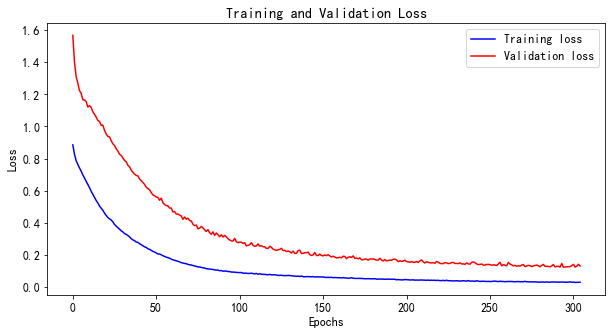

In [33]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(10,5))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training and Validation Loss")

In [34]:
pred=model.predict(df_INPUT.values)
df_pred=pd.DataFrame(data=pred, columns=df_NUMERIC.columns)
df_pred[:]=scaler.inverse_transform(df_pred.values)
df_gnd=pd.DataFrame(data=scaler.inverse_transform(df_NUMERIC),columns=df_NUMERIC.columns)
PRED,GND='预测值','真实值'
df=df_pred.join(df_gnd, rsuffix=GND, lsuffix=PRED).join(df_INDEX)
df.to_csv('问题3-预测结果-训练集.csv', index=False)
df

,SOC土壤有机碳预测值,SIC土壤无机碳预测值,STC土壤全碳预测值,全氮N预测值,土壤C/N比预测值,SOC土壤有机碳真实值,SIC土壤无机碳真实值,STC土壤全碳真实值,全氮N真实值,土壤C/N比真实值,year,放牧强度（intensity）,放牧小区（plot）
0,12.122268,11.575859,23.692497,1.379817,17.385387,12.164092,11.550000,23.714092,1.378942,17.394695,2012,HGI,G13
1,13.064907,10.846013,23.913933,1.752497,14.240614,13.066348,10.849667,23.916014,1.752764,14.245073,2012,HGI,G20
2,13.439795,11.956115,25.381880,1.645841,17.062847,13.474534,11.875000,25.349534,1.648023,17.020659,2012,HGI,G9
3,12.447754,10.512358,22.960102,1.649705,14.455209,12.469286,10.491667,22.960953,1.648516,14.458516,2012,LGI,G12
4,11.982439,8.995665,20.960686,1.534310,14.018139,12.021940,8.925000,20.946940,1.537228,13.980016,2012,LGI,G18
5,14.293139,13.964771,28.263794,1.896250,15.186458,14.327432,13.958333,28.285766,1.895496,15.199783,2012,LGI,G6
6,14.203217,6.735074,20.937208,1.749234,12.499669,14.226167,6.712500,20.938667,1.749771,12.481757,2012,MGI,G11
7,11.603613,8.975295,20.569450,1.695117,12.410774,11.638731,8.950000,20.588731,1.698386,12.383591,2012,MGI,G16
8,13.630177,9.585060,23.223536,1.762683,13.436836,13.677481,9.541667,23.219148,1.763731,13.412295,2012,MGI,G8
9,13.944776,10.976393,24.914967,1.658313,16.019949,13.973544,10.950000,24.923544,1.659076,16.012928,2012,NG,G17


## 全体训练样本上的拟合效果

In [35]:
def plotPredGndSample(name, df):
    return px.line(df, y=[name+GND, name+PRED]
                  ).update_layout(title=f'{name}拟合效果',
                                  legend_title='预测值/真实值',yaxis_title='取值',xaxis_title='样本')
    

In [36]:
plotPredGndSample(SOC, df)

In [37]:
plotPredGndSample(SIC, df)

In [38]:
plotPredGndSample(STC, df)

In [39]:
plotPredGndSample(ALLN, df)

In [40]:
plotPredGndSample(CN, df)

## 不同放牧强度和小区的样本上的拟合效果

In [41]:
df_list=list(df.groupby([INTENSITY,BLOCK]))

In [42]:
def plotPredGnd(i, y):
    info, df = df_list[i]
    return px.line(df, x=YEAR, 
                   y=[y+GND,y+PRED]).update_layout(title=f'放牧强度{info[0]}下小区{info[1]}的{y}拟合效果',
                                                  yaxis_title='取值', xaxis_title='年份', legend_title='预测值/真实值')

In [43]:
plotPredGnd(2, SOC)

In [44]:
plotPredGnd(2, SIC)

In [45]:
plotPredGnd(2, STC)

In [46]:
plotPredGnd(2, ALLN)

In [47]:
plotPredGnd(2, CN)

In [48]:
plotPredGnd(2, SOC)